In [1]:
# Import Dependencies
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\kurra\Desktop\DIG\Internship\flyzy_review.csv")
df.head(2)

,sentiment_polarity,sentiment_polarity_confidence,negative_reason,negativereason_confidence,airline_name,airline_sentiment_gold,name,negativereason_gold,retweet_count,Review,tweet_coord,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/15 11:35,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/15 11:15,NaN,Pacific Time (US & Canada)


In [2]:
# no of features in dataset
df.columns

Index(['sentiment_polarity', 'sentiment_polarity_confidence',
       'negative_reason', 'negativereason_confidence', 'airline_name',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'Review', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [3]:
df.shape

(14640, 14)

In [4]:
# null values
df.isna().sum()

sentiment_polarity                   0
sentiment_polarity_confidence        0
negative_reason                   5462
negativereason_confidence         4118
airline_name                         0
airline_sentiment_gold           14600
name                                 0
negativereason_gold              14608
retweet_count                        0
Review                               0
tweet_coord                      13621
tweet_created                        0
tweet_location                    4733
user_timezone                     4820
dtype: int64

In [2]:
# data.iloc[:,[0,1,3,5]] another method
data = df[['sentiment_polarity','negative_reason','airline_name','Review']]
data

,sentiment_polarity,negative_reason,airline_name,Review
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...
14635,positive,NaN,American,@AmericanAir thank you we got on a different f...
14636,negative,Customer Service Issue,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,NaN,American,@AmericanAir Please bring American Airlines to...
14638,negative,Customer Service Issue,American,"@AmericanAir you have my money, you change my ..."


In [3]:
# Replaced all null values in Negative_reason columns
df1 = data.fillna("nill")

In [7]:
# Removed all Null Values
df1.isna().sum()

sentiment_polarity    0
negative_reason       0
airline_name          0
Review                0
dtype: int64

In [4]:
# Cleaned dataset after removed NaN values
df1.head()

,sentiment_polarity,negative_reason,airline_name,Review
0,neutral,nill,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,nill,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,nill,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...


<AxesSubplot:xlabel='sentiment_polarity'>

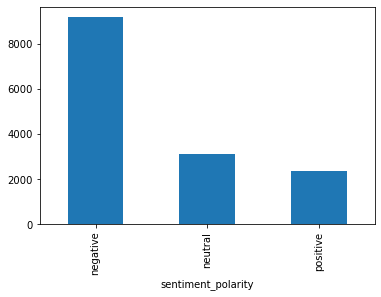

In [9]:
import matplotlib.pyplot as plt
df1.groupby(['sentiment_polarity']).count().negative_reason.plot(kind='bar')

In [5]:
x1 = df1.drop('sentiment_polarity', axis = 1)
x1['Review_reason'] = df1['negative_reason'] + ' ' + df1['Review']
x1 = x1.drop(['negative_reason','airline_name', 'Review'], axis = 1)
x1.head(5)

,Review_reason
0,nill @VirginAmerica What @dhepburn said.
1,nill @VirginAmerica plus you've added commerci...
2,nill @VirginAmerica I didn't today... Must mea...
3,Bad Flight @VirginAmerica it's really aggressi...
4,Can't Tell @VirginAmerica and it's a really bi...


In [6]:
y = df1['sentiment_polarity'].replace(['positive','negative','neutral'],[1,-1,0])
y.head(5)                                

0    0
1    1
2    0
3   -1
4   -1
Name: sentiment_polarity, dtype: int64

In [7]:
# Preprocessing Task for Text Dataset
# Importing Dependencies
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kurra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kurra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
ps = PorterStemmer()
lem = WordNetLemmatizer()

In [10]:
# function to stem the content
def stemming(content):
    content = re.sub('[^a-zA-Z]',' ', content)
    content = content.lower()
    content = word_tokenize(content)
    #content = content.split()
    content = [ps.stem(word) for word in content if not word in stopwords.words('english')]
    content = [lem.lemmatize(word) for word in content]
    return " ".join(content)

In [11]:
x1['Review_reason'] = x1['Review_reason'].apply(stemming)

In [12]:
x1

,Review_reason
0,nill virginamerica dhepburn said
1,nill virginamerica plu ad commerci experi tacki
2,nill virginamerica today must mean need take a...
3,bad flight virginamerica realli aggress blast ...
4,tell virginamerica realli big bad thing
...,...
14635,nill americanair thank got differ flight chicago
14636,custom servic issu americanair leav minut late...
14637,nill americanair plea bring american airlin bl...
14638,custom servic issu americanair money chang fli...


In [13]:
x2 = x1['Review_reason'].values
x2 

array(['nill virginamerica dhepburn said',
       'nill virginamerica plu ad commerci experi tacki',
       'nill virginamerica today must mean need take anoth trip', ...,
       'nill americanair plea bring american airlin blackberri',
       'custom servic issu americanair money chang flight answer phone suggest make commit',
       'nill americanair ppl need know mani seat next flight plz put u standbi peopl next flight'],
      dtype=object)

In [14]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x2)
X = vectorizer.transform(x2)

In [15]:
print(X)

  (0, 9997)	0.3545116818202281
  (0, 7984)	0.4419976486799406
  (0, 6278)	0.16207964352885437
  (0, 2298)	0.8078921556544268
  (1, 9997)	0.2530394250318121
  (1, 8978)	0.5766483222918803
  (1, 7088)	0.3785063958390433
  (1, 6278)	0.11568741429711116
  (1, 2981)	0.3052480301551673
  (1, 1733)	0.44864566271375295
  (1, 90)	0.39030475487014427
  (2, 9997)	0.29368056146655575
  (2, 9441)	0.3493325116352576
  (2, 9317)	0.30724855133408496
  (2, 8988)	0.3162998758645117
  (2, 6278)	0.13426818678993718
  (2, 6172)	0.27655773267168593
  (2, 6072)	0.4719850452357394
  (2, 5716)	0.40681990230415266
  (2, 381)	0.3383589795486256
  (3, 9997)	0.17384543645754164
  (3, 7584)	0.3522033775926179
  (3, 7549)	0.195896592000614
  (3, 6515)	0.3799458465481973
  (3, 5343)	0.25503537062858045
  :	:
  (14638, 8834)	0.4193598888048665
  (14638, 8193)	0.15197623855572942
  (14638, 6986)	0.2745262854627261
  (14638, 5958)	0.3700673234539471
  (14638, 5576)	0.2715930862735639
  (14638, 4640)	0.15579741551216836


In [21]:
print(X.shape)
print(y.shape)

(14640, 10769)
(14640,)


In [62]:
y.shape

(14640,)

In [59]:
# Looking for data imbalance
from collections import Counter

In [61]:
sorted(Counter(y).items())

[(-1, 9178), (0, 3099), (1, 2363)]

In [16]:
# Spliting dataset for train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [23]:
# Using Logistic Regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred = log.predict(x_test)

In [25]:
#Accuracy score
log_score = accuracy_score(y_test,y_pred)
log_score

0.941712204007286

In [26]:
# Using Support Vector Classcification
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(x_train,y_train)

SVC()

In [27]:
y_svc_pred = model_svc.predict(x_test)

In [28]:
svc_accuracy_score = accuracy_score(y_test,y_svc_pred)
svc_accuracy_score

0.938752276867031

In [29]:
positive = x1['Review_reason'][1]

In [30]:
model_svc.predict(X[6555])

array([0], dtype=int64)

# Using XGBoost 

In [18]:
import xgboost
from sklearn.model_selection import GridSearchCV
model_xbg = xgboost.XGBClassifier()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(y_train)
Y_test = le.fit_transform(y_test)

In [21]:
eval_set = [(x_test,Y_test)]
model_xbg.fit(x_train,Y_train,early_stopping_rounds=10,eval_set=eval_set,verbose=True)

C:\Users\kurra\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:0.77636
[1]	validation_0-mlogloss:0.59134
[2]	validation_0-mlogloss:0.47412
[3]	validation_0-mlogloss:0.39361
[4]	validation_0-mlogloss:0.33802
[5]	validation_0-mlogloss:0.29760
[6]	validation_0-mlogloss:0.26735
[7]	validation_0-mlogloss:0.24478
[8]	validation_0-mlogloss:0.22797
[9]	validation_0-mlogloss:0.21483
[10]	validation_0-mlogloss:0.20441
[11]	validation_0-mlogloss:0.19691
[12]	validation_0-mlogloss:0.19076
[13]	validation_0-mlogloss:0.18580
[14]	validation_0-mlogloss:0.18173
[15]	validation_0-mlogloss:0.17796
[16]	validation_0-mlogloss:0.17543
[17]	validation_0-mlogloss:0.17351
[18]	validation_0-mlogloss:0.17169
[19]	validation_0-mlogloss:0.16991
[20]	validation_0-mlogloss:0.16867
[21]	validation_0-mlogloss:0.16746
[22]	validation_0-mlogloss:0.16679
[23]	validation_0-mlogloss:0.16577
[24]	validation_0-mlogloss:0.16485
[25]	validation_0-mlogloss:0.16410
[26]	validation_0-mlogloss:0.16368
[27]	validation_0-mlogloss:0.16316
[28]	validation_0-mlogloss:0.1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [22]:
y_pred = model_xbg.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score

In [25]:
xgb_score1 = accuracy_score(y_pred,Y_test)
xgb_score1

0.9319216757741348

In [ ]:
# For more feature the below code used to find the most important feature
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model_xbg)
plt.show()

In [ ]:
# plot_tree in xgboost gives pictorial representation of tree made
plt.figure(figsize=(10,15))
xgboost.plot_tree(model_xbg, ax=plt.gca());

# Using DecisionTreeClassifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()

In [50]:
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1)
             }

In [51]:
grid_cv = GridSearchCV(estimator=model_dtc,param_grid=grid_pram,cv=5)

In [52]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [53]:
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 33,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [54]:
model_dtc_best = DecisionTreeClassifier(criterion='entropy',
    splitter='best',
    max_depth=33,
    min_samples_split=5,
    min_samples_leaf=1,)

In [55]:
model_dtc_best.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=33, min_samples_split=5)

In [56]:
model_dtc_best.score(x_train,y_train)

0.9677010148321624

In [57]:
model_dtc_best.score(x_test,y_test)

0.9253187613843351